# Preprocessing and clustering datasets of different ages of the colon
##### Runs on stenv3

In [1]:
# imports libraries 
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# error settings to avoid crowding the notebook
sc.settings.verbosity = 0             
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
def get_cluster_proportions(adata,
                            cluster_key="cluster_final",
                            sample_key="replicate",
                            drop_values=None):
    """
    Input
    =====
    adata : AnnData object
    cluster_key : key of `adata.obs` storing cluster info
    sample_key : key of `adata.obs` storing sample/replicate info
    drop_values : list/iterable of possible values of `sample_key` that you don't want
    
    Returns
    =======
    pd.DataFrame with samples as the index and clusters as the columns and 0-100 floats
    as values
    """
    
    adata_tmp = adata.copy()
    sizes = adata_tmp.obs.groupby([cluster_key, sample_key]).size()
    props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
    props = props.pivot(columns=sample_key, index=cluster_key).T
    props.index = props.index.droplevel(0)
    props.fillna(0, inplace=True)
    
    if drop_values is not None:
        for drop_value in drop_values:
            props.drop(drop_value, axis=0, inplace=True)
    return props


def plot_cluster_proportions(cluster_props, 
                             cluster_palette=None,
                             xlabel_rotation=0,
                             order = None): 
    fig, ax = plt.subplots(dpi=300)
    fig.patch.set_facecolor("white")
    
    cmap = None
    if cluster_palette is not None:
        cmap = sns.palettes.blend_palette(
            cluster_palette, 
            n_colors=len(cluster_palette), 
            as_cmap=True)
   
    cluster_props = cluster_props.reindex(order)

    cluster_props.plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        legend=None, 
        colormap=cmap
    )
    
    ax.legend(bbox_to_anchor=(1.01, 1), frameon=False, title="Cluster")
    sns.despine(fig, ax)
    ax.tick_params(axis="x", rotation=xlabel_rotation)
    ax.set_xlabel(cluster_props.index.name.capitalize())
    ax.set_ylabel("Proportion")
    fig.tight_layout()
    
    return fig


In [4]:
# reads in 10x mtx 
# adjust the paths accordingly
anndata_0d = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/0d'))
anndata_1w = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/1w'))
anndata_2w = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/2w'))
anndata_3w = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/3w'))
anndata_4w = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w'))
anndata_6w = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/6w'))
anndata_8w = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w'))
anndata_6m = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/6m'))
anndata_1yr = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/1yr'))
anndata_2yr = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/2yr'))

# reads in v2 data 
anndata_8w_rep1 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_v2_rep1'))
anndata_8w_rep2 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_v2_rep2'))
anndata_8w_rep3 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_v2_rep3'))
anndata_8w_rep4 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_rep4'))
anndata_8w_rep5 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_rep5'))
anndata_8w_rep6 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_rep6'))
anndata_8w_rep7 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/8w_rep7'))
anndata_4w_rep1 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w_rep1'))
anndata_4w_rep2 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w_rep2'))
anndata_4w_rep3 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w_rep3'))
anndata_4w_rep4 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w_rep4'))
anndata_4w_rep5 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w_rep5'))
anndata_4w_rep6 = sc.read_10x_mtx(os.path.join(os.getcwd(),'/home/svickovi/data/10x_data/4w_rep6'))


In [5]:
# add channel info into batches for tracking
### 0days
anndata_0d.obs['age'] = '0d'
anndata_0d.obs['Unique_ID'] = 'S1'
anndata_0d.obs['Mouse_ID'] = 'M1'
anndata_0d.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_0d.obs['Mouse_ID'],anndata_0d.obs['Unique_ID'])]
anndata_0d.obs['10x_version'] = 'v3'
anndata_0d.obs['Region'] = 'All'

#### 1week
anndata_1w.obs['age'] = '1w'
anndata_1w.obs['Unique_ID'] = 'S15'
anndata_1w.obs['Mouse_ID'] = 'M1'
anndata_1w.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_1w.obs['Mouse_ID'],anndata_1w.obs['Unique_ID'])]
anndata_1w.obs['10x_version'] = 'v3'
anndata_1w.obs['Region'] = 'All'

#### 2weeks
anndata_2w.obs['age'] = '2w'
anndata_2w.obs['Unique_ID'] = 'S16'
anndata_2w.obs['Mouse_ID'] = 'M1'
anndata_2w.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_2w.obs['Mouse_ID'],anndata_2w.obs['Unique_ID'])]
anndata_2w.obs['10x_version'] = 'v3'
anndata_2w.obs['Region'] = 'All'

#### 3weeks
anndata_3w.obs['age'] = '3w'
anndata_3w.obs['Unique_ID'] = 'S17'
anndata_3w.obs['Mouse_ID'] = 'M1'
anndata_3w.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_3w.obs['Mouse_ID'],anndata_3w.obs['Unique_ID'])]
anndata_3w.obs['10x_version'] = 'v3'
anndata_3w.obs['Region'] = 'All'

#### 4weeks
anndata_4w.obs['age'] = '4w'
anndata_4w.obs['Unique_ID'] = 'S18'
anndata_4w.obs['Mouse_ID'] = 'M1'
anndata_4w.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w.obs['Mouse_ID'],anndata_4w.obs['Unique_ID'])]
anndata_4w.obs['10x_version'] = 'v3'
anndata_4w.obs['Region'] = 'All'

anndata_4w_rep1.obs['age'] = '4w'
anndata_4w_rep1.obs['Unique_ID'] = 'S9'
anndata_4w_rep1.obs['Mouse_ID'] = 'M2'
anndata_4w_rep1.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w_rep1.obs['Mouse_ID'],anndata_4w_rep1.obs['Unique_ID'])]
anndata_4w_rep1.obs['10x_version'] = 'v2'
anndata_4w_rep1.obs['Region'] = 'Distal'

anndata_4w_rep2.obs['age'] = '4w'
anndata_4w_rep2.obs['Unique_ID'] = 'S10'
anndata_4w_rep2.obs['Mouse_ID'] = 'M2'
anndata_4w_rep2.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w_rep2.obs['Mouse_ID'],anndata_4w_rep2.obs['Unique_ID'])]
anndata_4w_rep2.obs['10x_version'] = 'v2'
anndata_4w_rep2.obs['Region'] = 'Middle'

anndata_4w_rep3.obs['age'] = '4w'
anndata_4w_rep3.obs['Unique_ID'] = 'S11'
anndata_4w_rep3.obs['Mouse_ID'] = 'M2'
anndata_4w_rep3.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w_rep3.obs['Mouse_ID'],anndata_4w_rep3.obs['Unique_ID'])]
anndata_4w_rep3.obs['10x_version'] = 'v2'
anndata_4w_rep3.obs['Region'] = 'Proximal'

anndata_4w_rep4.obs['age'] = '4w'
anndata_4w_rep4.obs['Unique_ID'] = 'S12'
anndata_4w_rep4.obs['Mouse_ID'] = 'M4'
anndata_4w_rep4.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w_rep4.obs['Mouse_ID'],anndata_4w_rep4.obs['Unique_ID'])]
anndata_4w_rep4.obs['10x_version'] = 'v2'
anndata_4w_rep4.obs['Region'] = 'Distal'

anndata_4w_rep5.obs['age'] = '4w'
anndata_4w_rep5.obs['Unique_ID'] = 'S13'
anndata_4w_rep5.obs['Mouse_ID'] = 'M4'
anndata_4w_rep5.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w_rep5.obs['Mouse_ID'],anndata_4w_rep5.obs['Unique_ID'])]
anndata_4w_rep5.obs['10x_version'] = 'v2'
anndata_4w_rep5.obs['Region'] = 'Middle'

anndata_4w_rep6.obs['age'] = '4w'
anndata_4w_rep6.obs['Unique_ID'] = 'S14'
anndata_4w_rep6.obs['Mouse_ID'] = 'M4'
anndata_4w_rep6.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_4w_rep6.obs['Mouse_ID'],anndata_4w_rep6.obs['Unique_ID'])]
anndata_4w_rep6.obs['10x_version'] = 'v2'
anndata_4w_rep6.obs['Region'] = 'Proximal'

#### 6weeks
anndata_6w.obs['age'] = '6w'
anndata_6w.obs['Unique_ID'] = 'S19'
anndata_6w.obs['Mouse_ID'] = 'M1'
anndata_6w.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_6w.obs['Mouse_ID'],anndata_6w.obs['Unique_ID'])]
anndata_6w.obs['10x_version'] = 'v3'
anndata_6w.obs['Region'] = 'All'
#### 8weeks
anndata_8w.obs['age'] = '8w'
anndata_8w.obs['Unique_ID'] = 'S20'
anndata_8w.obs['Mouse_ID'] = 'M1'
anndata_8w.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w.obs['Mouse_ID'],anndata_8w.obs['Unique_ID'])]
anndata_8w.obs['10x_version'] = 'v3'
anndata_8w.obs['Region'] = 'All'

anndata_8w_rep1.obs['age'] = '8w'
anndata_8w_rep1.obs['Unique_ID'] = 'S2'
anndata_8w_rep1.obs['Mouse_ID'] = 'M3'
anndata_8w_rep1.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep1.obs['Mouse_ID'],anndata_8w_rep1.obs['Unique_ID'])]
anndata_8w_rep1.obs['10x_version'] = 'v2'
anndata_8w_rep1.obs['Region'] = 'Distal'

anndata_8w_rep2.obs['age'] = '8w'
anndata_8w_rep2.obs['Unique_ID'] = 'S3'
anndata_8w_rep2.obs['Mouse_ID'] = 'M4'
anndata_8w_rep2.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep2.obs['Mouse_ID'],anndata_8w_rep2.obs['Unique_ID'])]
anndata_8w_rep2.obs['10x_version'] = 'v2'
anndata_8w_rep2.obs['Region'] = 'Distal'

anndata_8w_rep3.obs['age'] = '8w'
anndata_8w_rep3.obs['Unique_ID'] = 'S4'
anndata_8w_rep3.obs['Mouse_ID'] = 'M5'
anndata_8w_rep3.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep3.obs['Mouse_ID'],anndata_8w_rep3.obs['Unique_ID'])]
anndata_8w_rep3.obs['10x_version'] = 'v2'
anndata_8w_rep3.obs['Region'] = 'Distal'

anndata_8w_rep4.obs['age'] = '8w'
anndata_8w_rep4.obs['Unique_ID'] = 'S5'
anndata_8w_rep4.obs['Mouse_ID'] = 'M2'
anndata_8w_rep4.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep4.obs['Mouse_ID'],anndata_8w_rep4.obs['Unique_ID'])]
anndata_8w_rep4.obs['10x_version'] = 'v2'
anndata_8w_rep4.obs['Region'] = 'Distal'

anndata_8w_rep5.obs['age'] = '8w'
anndata_8w_rep5.obs['Unique_ID'] = 'S6'
anndata_8w_rep5.obs['Mouse_ID'] = 'M2'
anndata_8w_rep5.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep5.obs['Mouse_ID'],anndata_8w_rep5.obs['Unique_ID'])]
anndata_8w_rep5.obs['10x_version'] = 'v2'
anndata_8w_rep5.obs['Region'] = 'Middle'

anndata_8w_rep6.obs['age'] = '8w'
anndata_8w_rep6.obs['Unique_ID'] = 'S7'
anndata_8w_rep6.obs['Mouse_ID'] = 'M3'
anndata_8w_rep6.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep6.obs['Mouse_ID'],anndata_8w_rep6.obs['Unique_ID'])]
anndata_8w_rep6.obs['10x_version'] = 'v2'
anndata_8w_rep6.obs['Region'] = 'Distal'

anndata_8w_rep7.obs['age'] = '8w'
anndata_8w_rep7.obs['Unique_ID'] = 'S8'
anndata_8w_rep7.obs['Mouse_ID'] = 'M3'
anndata_8w_rep7.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_8w_rep7.obs['Mouse_ID'],anndata_8w_rep7.obs['Unique_ID'])]
anndata_8w_rep7.obs['10x_version'] = 'v2'
anndata_8w_rep7.obs['Region'] = 'Middle'

#### 6months
anndata_6m.obs['age'] = '6m'
anndata_6m.obs['Unique_ID'] = 'S21'
anndata_6m.obs['Mouse_ID'] = 'M1'
anndata_6m.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_6m.obs['Mouse_ID'],anndata_6m.obs['Unique_ID'])]
anndata_6m.obs['10x_version'] = 'v3'
anndata_6m.obs['Region'] = 'All'

#### 1yrs
anndata_1yr.obs['age'] = '1yr'
anndata_1yr.obs['Unique_ID'] = 'S22'
anndata_1yr.obs['Mouse_ID'] = 'M1'
anndata_1yr.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_1yr.obs['Mouse_ID'],anndata_1yr.obs['Unique_ID'])]
anndata_1yr.obs['10x_version'] = 'v3'
anndata_1yr.obs['Region'] = 'All'

#### 2yrs
anndata_2yr.obs['age'] = '2yr'
anndata_2yr.obs['Unique_ID'] = 'S23'
anndata_2yr.obs['Mouse_ID'] = 'M1'
anndata_2yr.obs['Sample_ID'] = [i+"_"+j for i,j in zip(anndata_2yr.obs['Mouse_ID'],anndata_2yr.obs['Unique_ID'])]
anndata_2yr.obs['10x_version'] = 'v3'
anndata_2yr.obs['Region'] = 'All'

In [6]:
# combines multiple objects into one
anndata_all = anndata_0d.concatenate(anndata_1w, anndata_2w, anndata_3w, anndata_4w, 
                                    anndata_6w, anndata_8w, anndata_6m, anndata_1yr, anndata_2yr,
                                    anndata_8w_rep1, anndata_8w_rep2, anndata_8w_rep3, anndata_8w_rep4,
                                    anndata_8w_rep5, anndata_8w_rep6, anndata_8w_rep7, anndata_4w_rep1,
                                    anndata_4w_rep2, anndata_4w_rep3, anndata_4w_rep4, anndata_4w_rep5,
                                    anndata_4w_rep6)

In [7]:
anndata_all.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [8]:
# copy of object
adata = anndata_all.copy()

## Preprocessing

Show those genes that yield the highest fraction of counts in each single cells, across all cells.

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )

Basic filtering of genes per cell etc

In [10]:
sc.pp.filter_cells(adata, min_genes=700)
sc.pp.filter_genes(adata, min_cells=50)

Let us assemple some information about mitochondrial genes, which are important for quality control.

In [11]:
# calculate metrics about other genes
adata.var['Gm'] = adata.var_names.str.startswith('Gm') # annotate the group of ribosomal genes as 'ribo'
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl")) # annotate the group of ribosomal genes as 'ribo'
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['ribo'], percent_top=None, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['Gm'], percent_top=None, inplace=True)

A violin plot of some of the computed quality measures:

* the number of genes expressed in the count matrix
* the total counts per cell
* the percentage of counts in mitochondrial genes
* the percentage of counts in Gm genes
* the percentage of counts in Ribosomal genes

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_Gm','pct_counts_ribo'], groupby = 'age',
             jitter=0.4, multi_panel=True, order = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '6m', '1yr', '2yr'])

... storing 'age' as categorical
... storing 'Unique_ID' as categorical
... storing 'Mouse_ID' as categorical
... storing 'Sample_ID' as categorical
... storing '10x_version' as categorical
... storing 'Region' as categorical
... storing 'feature_types' as categorical
/home/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/svickovi/miniconda3/envs/stenv3/lib

Make correlation plots between total counts, mt counts and n_genes. Colors by batch (ie channel)

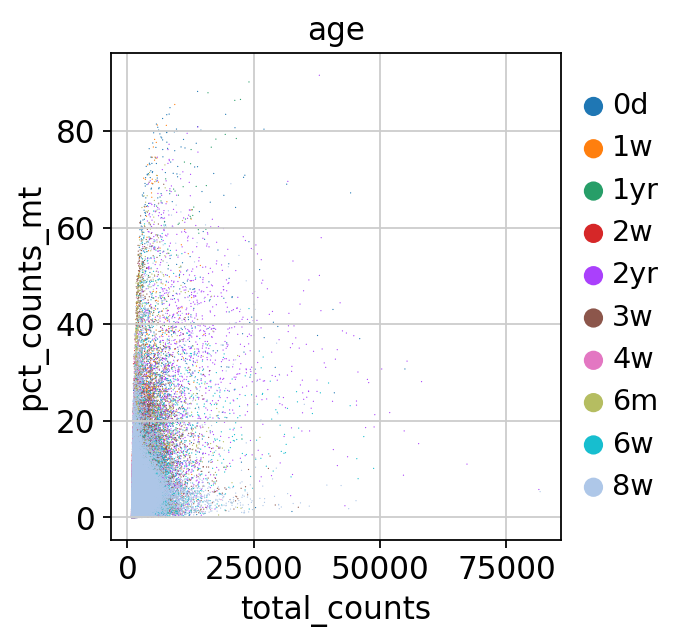

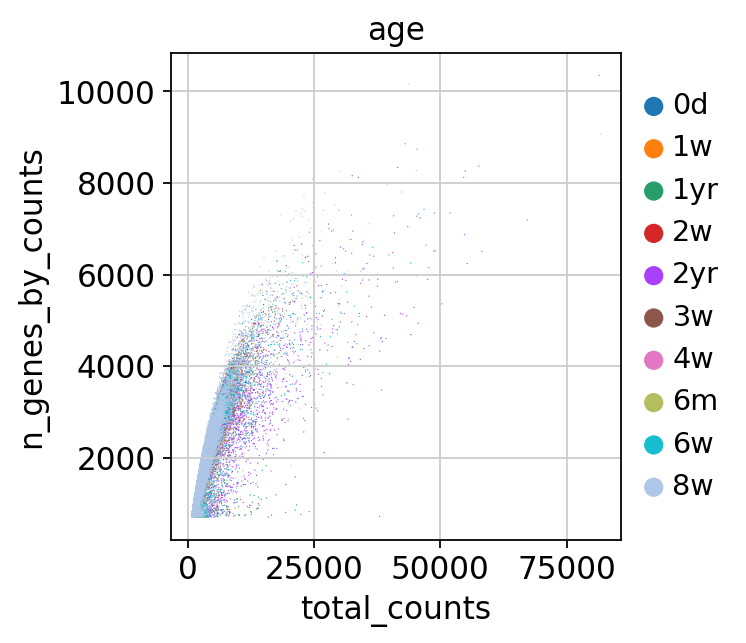

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color = 'age')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'age')

Scrub dublets (simple scrubber from Klein lab)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 4.2%
Estimated detectable doublet fraction = 44.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.3%
Elapsed time: 412.1 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

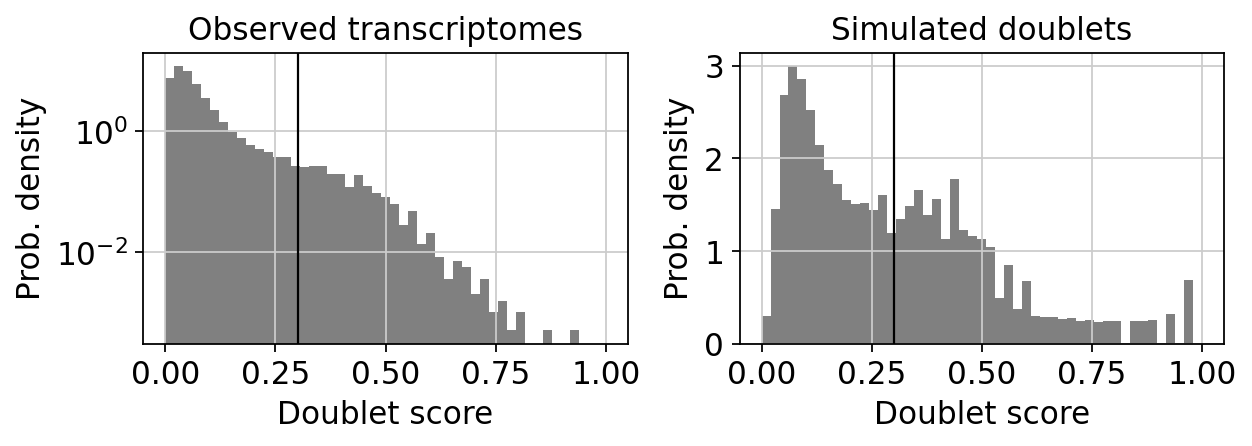

In [14]:
scrub = scr.Scrublet(adata.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

Actually do the filtering by slicing the `AnnData` object.

In [15]:
adata = adata[adata.obs.n_genes_by_counts > 700, :] # takes high quality cells
adata = adata[adata.obs.pct_counts_mt < 10, :] # removes cells with high mt
adata = adata[adata.obs.pct_counts_ribo < 10, :] # removes cells with high ribo
adata = adata[adata.obs.pct_counts_Gm < 20, :] # removes cells with high Gm
adata = adata[adata.obs.predicted_doublets == False] # removes dublets marked with scrubber

Copy of scrubbed and filtered data

In [16]:
adata_scr = adata.copy()

In [17]:
# Set the .raw attribute of AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.
#adata_scr.raw = adata_scr

In [18]:
# normalize if seurat_v3
sc.pp.normalize_total(adata_scr, target_sum=1e4)

In [19]:
#Logarithmize and scale the data.
sc.pp.log1p(adata_scr)

Mark cell cycle scores

... storing 'phase' as categorical
/home/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

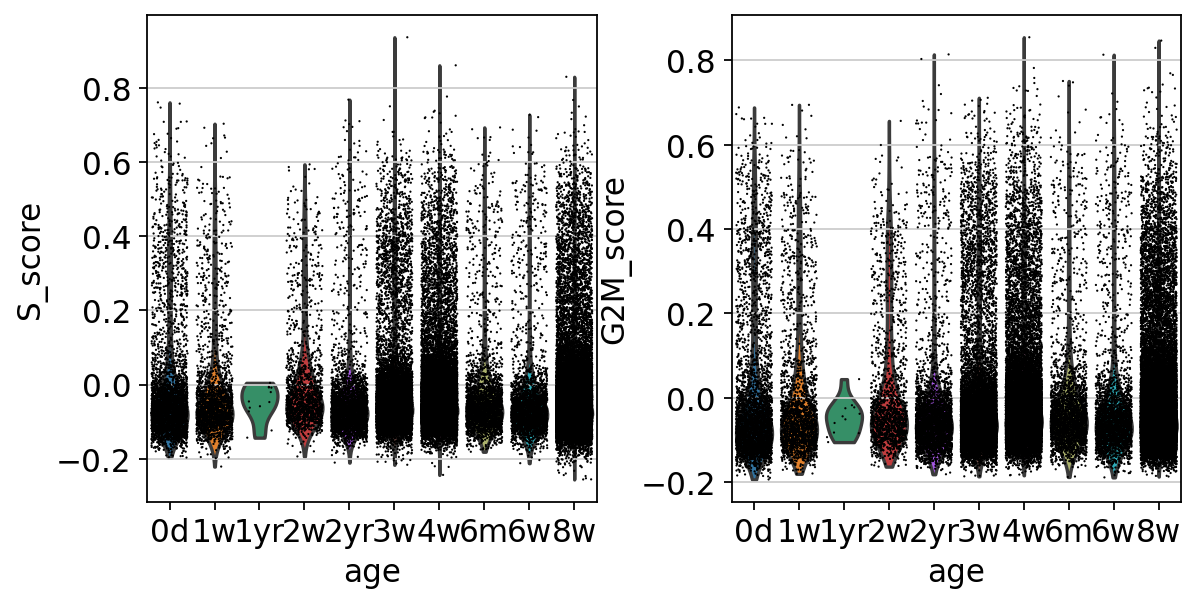

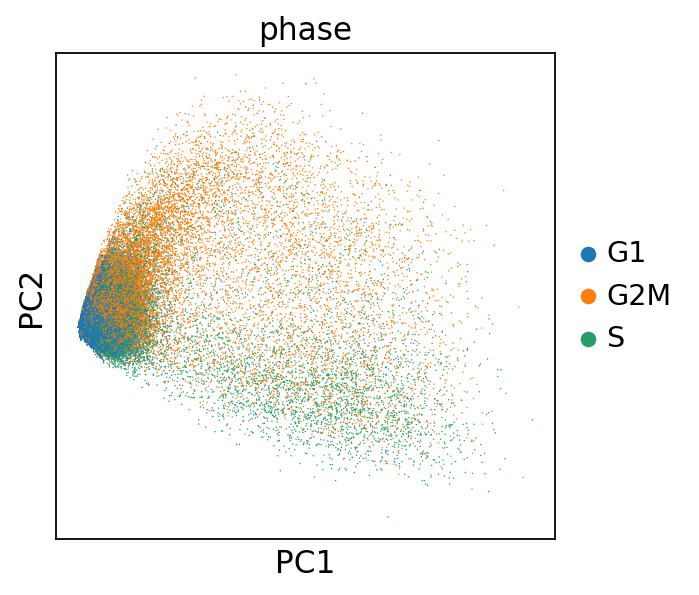

In [20]:
# check for cell cycle genes and score 
cell_cycle_genes = [x.strip() for x in open('/home/svickovi/data/marker_genes/regev_lab_cell_cycle_genes_mouse.txt')]# adjust path

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata_scr.var_names]

# does the scoring
sc.tl.score_genes_cell_cycle(adata_scr, s_genes=s_genes, g2m_genes=g2m_genes)

# plots cell cycle score per processed channel 
sc.pl.violin(adata_scr, ['S_score', 'G2M_score'], jitter=0.4, groupby = 'age')

#Sanity check how cell cycle affects look before regressing
adata_cc_genes = adata_scr[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

Use ENS paper DE genes as highly variable genes

In [21]:
de_genes = pd.read_excel('/home/svickovi/data/marker_genes/DE_genes_ENS_paper.xlsx', sheet_name = 'Mouse Colon All')

# Only keep certain columns
aba = de_genes[['ident', 'gene', 'padjH', 'log2fc', 'mean']]

# Only save genes which have fold-change > xx
aba = aba[(aba['log2fc'] > 1) & (aba['padjH'] <0.05)]
print('Total DE genes used: ', len(aba['gene']))
   

Total DE genes used:  2675


Run variable genes yourself if needed

In [22]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pp.highly_variable_genes(
#     adata_scr,
#     flavor="seurat_v3", # needs to be run on raw counts
#     n_top_genes=2000,
#     batch_key="age",
#     subset=True,
#     span=1
# )

# sc.pp.highly_variable_genes(
#     adata_scr,
#     flavor="seurat",
#     n_top_genes=1500,
#     batch_key="age",
#     subset=True,
# )


In [23]:
# subsets adata to var genes if using DE genes
adata_scr = adata_scr[:,adata_scr.var_names.isin(aba['gene'])]


Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

In [24]:
sc.pp.regress_out(adata_scr, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])

Scale each gene to unit variance. Clip values exceeding standard deviation 10. 

In [25]:
sc.pp.scale(adata_scr, max_value=10)

Sanity check how regression worked on mt- and cell cycle

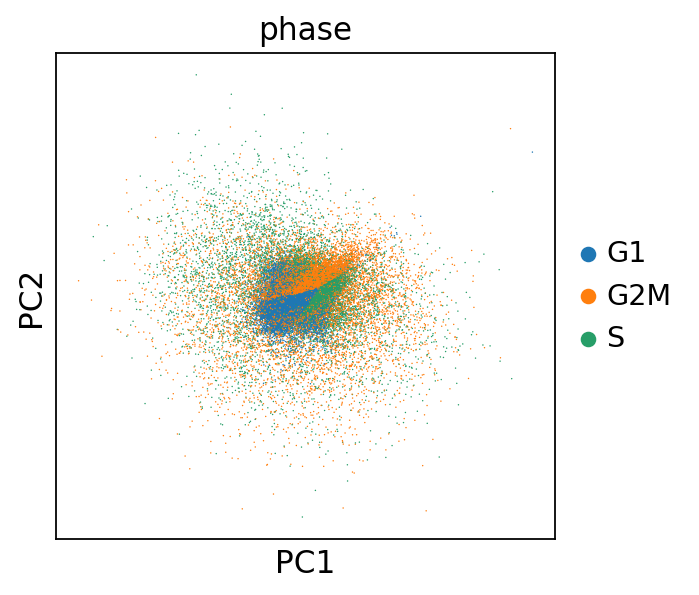

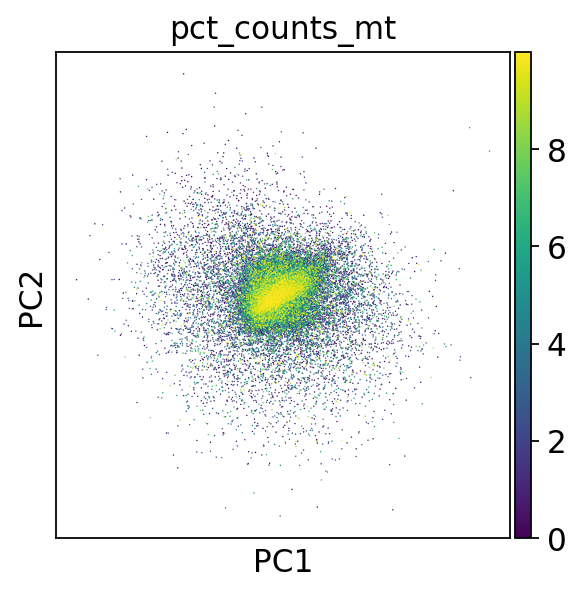

In [26]:
adata_cc_genes = adata_scr[:, adata_scr.var_names.isin(cell_cycle_genes)]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')
sc.pl.pca_scatter(adata_cc_genes, color='pct_counts_mt')

## Principal component analysis

Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [27]:
%env PYTHONHASHSEED=0
sc.tl.pca(adata_scr, svd_solver='arpack')
sc.pp.neighbors(adata_scr, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_scr)

env: PYTHONHASHSEED=0


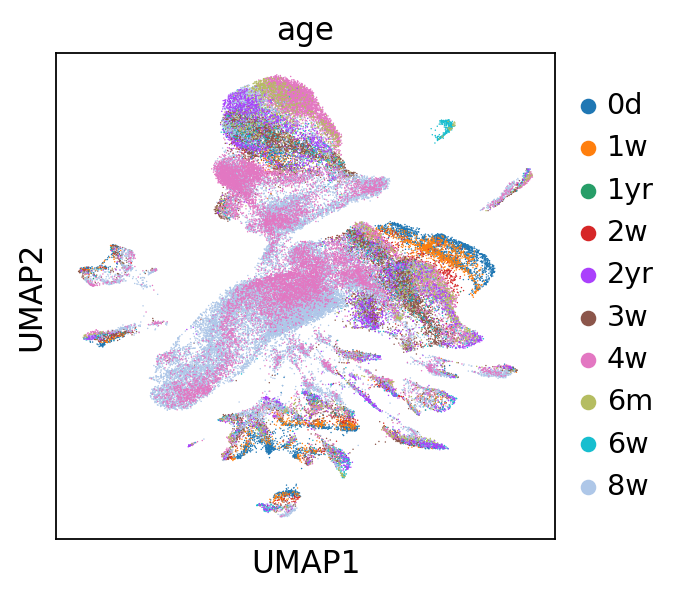

In [28]:
# Sanity check before harmony
sc.pl.umap(adata_scr, color=['age',])

### Use harmony for batch correction 

In [29]:
'Use harmony to correct for difference between animals'
adata_scr.obsm['X_harmony'] = harmonize(np.array(adata_scr.obsm['X_pca']), adata_scr.obs, batch_key = ['Sample_ID'])
sc.pp.neighbors(adata_scr, use_rep='X_harmony', n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_scr)

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).


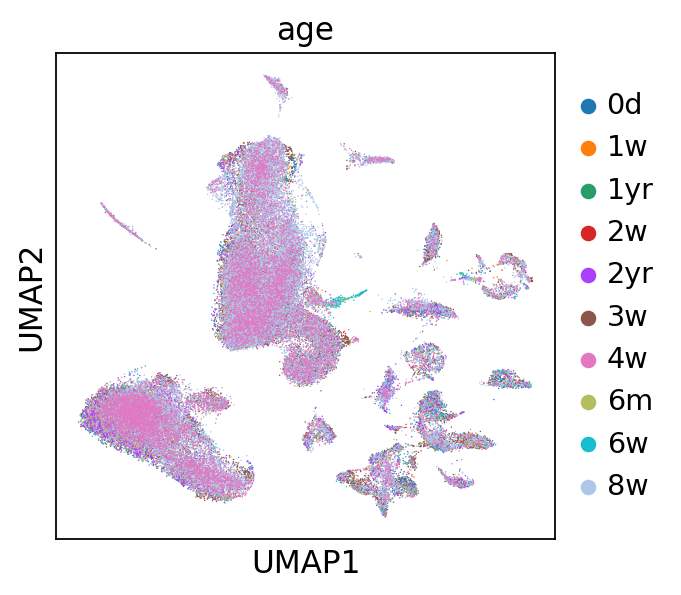

In [30]:
#sanity check after harmony
sc.pl.umap(adata_scr, color=['age',])

We can make a scatter plot in the UMAP coordinates

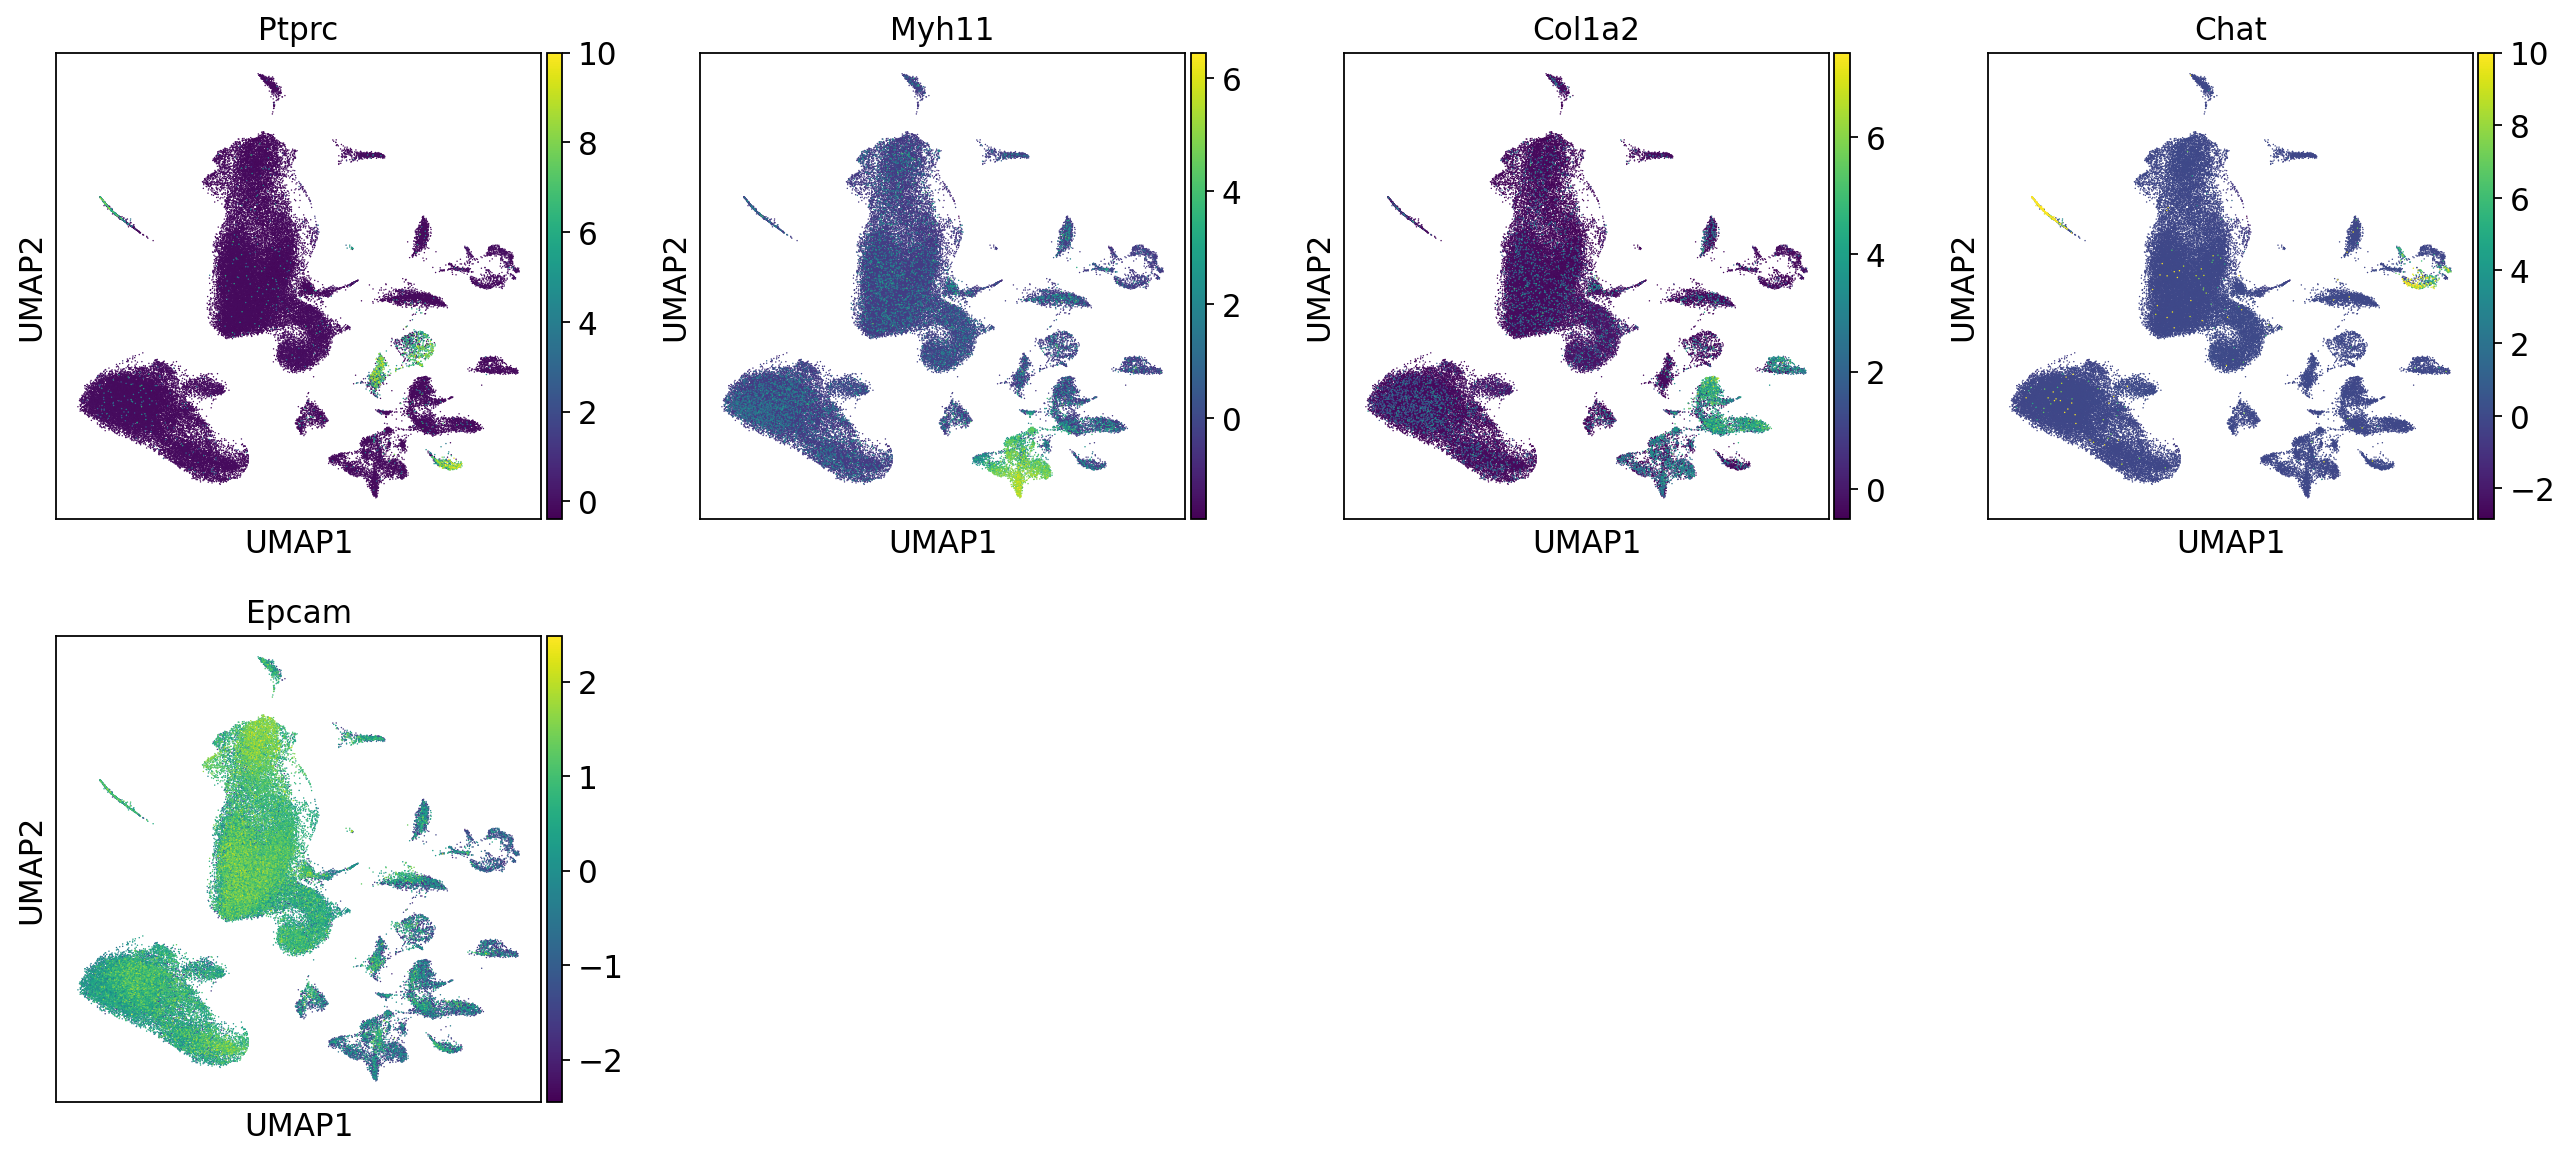

In [31]:
# plots sanity check for 4 genes
sc.pl.umap(adata_scr, color=['Ptprc', 'Myh11', 'Col1a2', 'Chat', 'Epcam'])

Let us inspect the contribution of single PCs to the total variance in the data. This is a sanity check that we picked correct npcs.

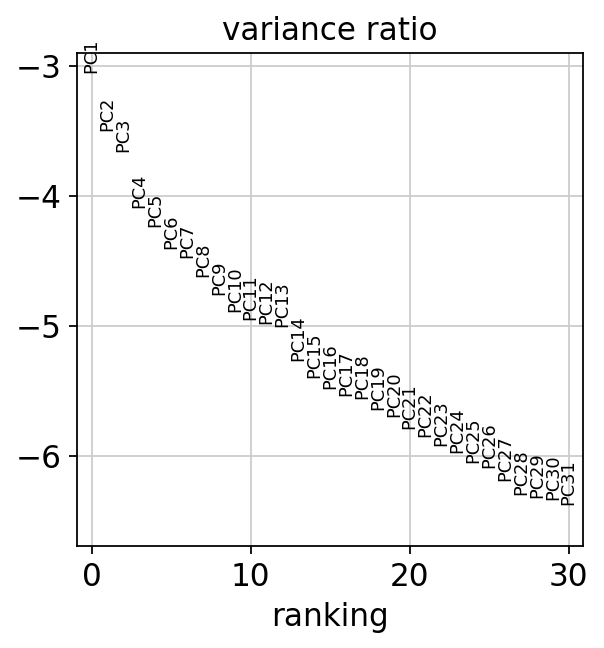

In [39]:
sc.pl.pca_variance_ratio(adata_scr, log=True)

Save the result.

In [33]:
adata_c = adata_scr.copy()

## Clustering the neighborhood graph

In [34]:
sc.tl.leiden(adata_c, key_added='leiden')

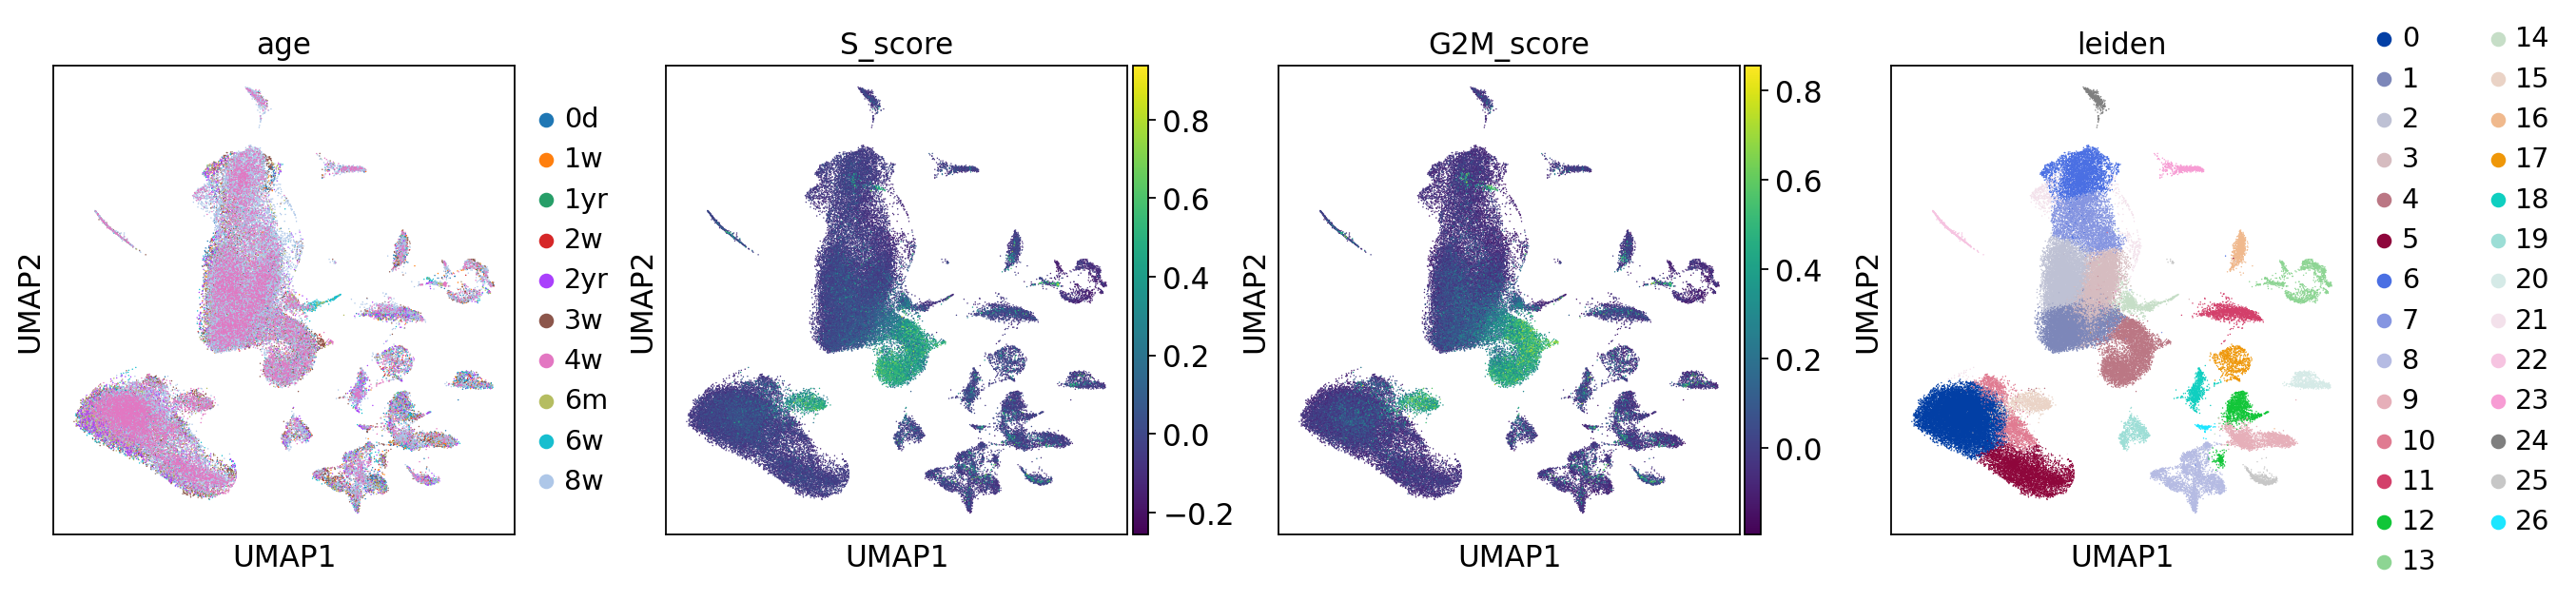

In [37]:
#plots the graphs
sc.pl.umap(adata_c, color=['age', 'S_score', 'G2M_score', 'leiden'], use_raw=False)

In [ ]:
# remove small clusters
# small_clusters = list(adata_c.obs['leiden'].value_counts()[adata_c.obs['leiden'].value_counts() < adata_c.obs['leiden'].value_counts().max()*0.025].index)
# adata_c = adata_c[adata_c.obs['leiden'].isin(small_clusters) == False]

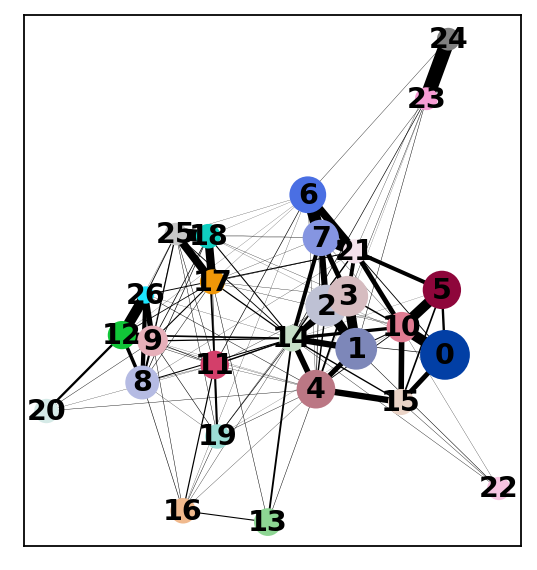

In [38]:
# make paga
sc.tl.paga(adata_c, groups = 'leiden')
sc.pl.paga(adata_c)  # remove `plot=False` if you want to see the coarse-grained graph

In [40]:
print('A total of ', len(adata_c.obs.index), ' cells in this dataset.')

A total of  71436  cells in this dataset.


In [46]:
'Rank genes yourself if needed'
sc.tl.rank_genes_groups(adata_c, groupby = 'leiden', use_raw=True, groups='all', reference='rest',key_added='leiden', method='t-test', corr_method='benjamini-hochberg')

/home/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


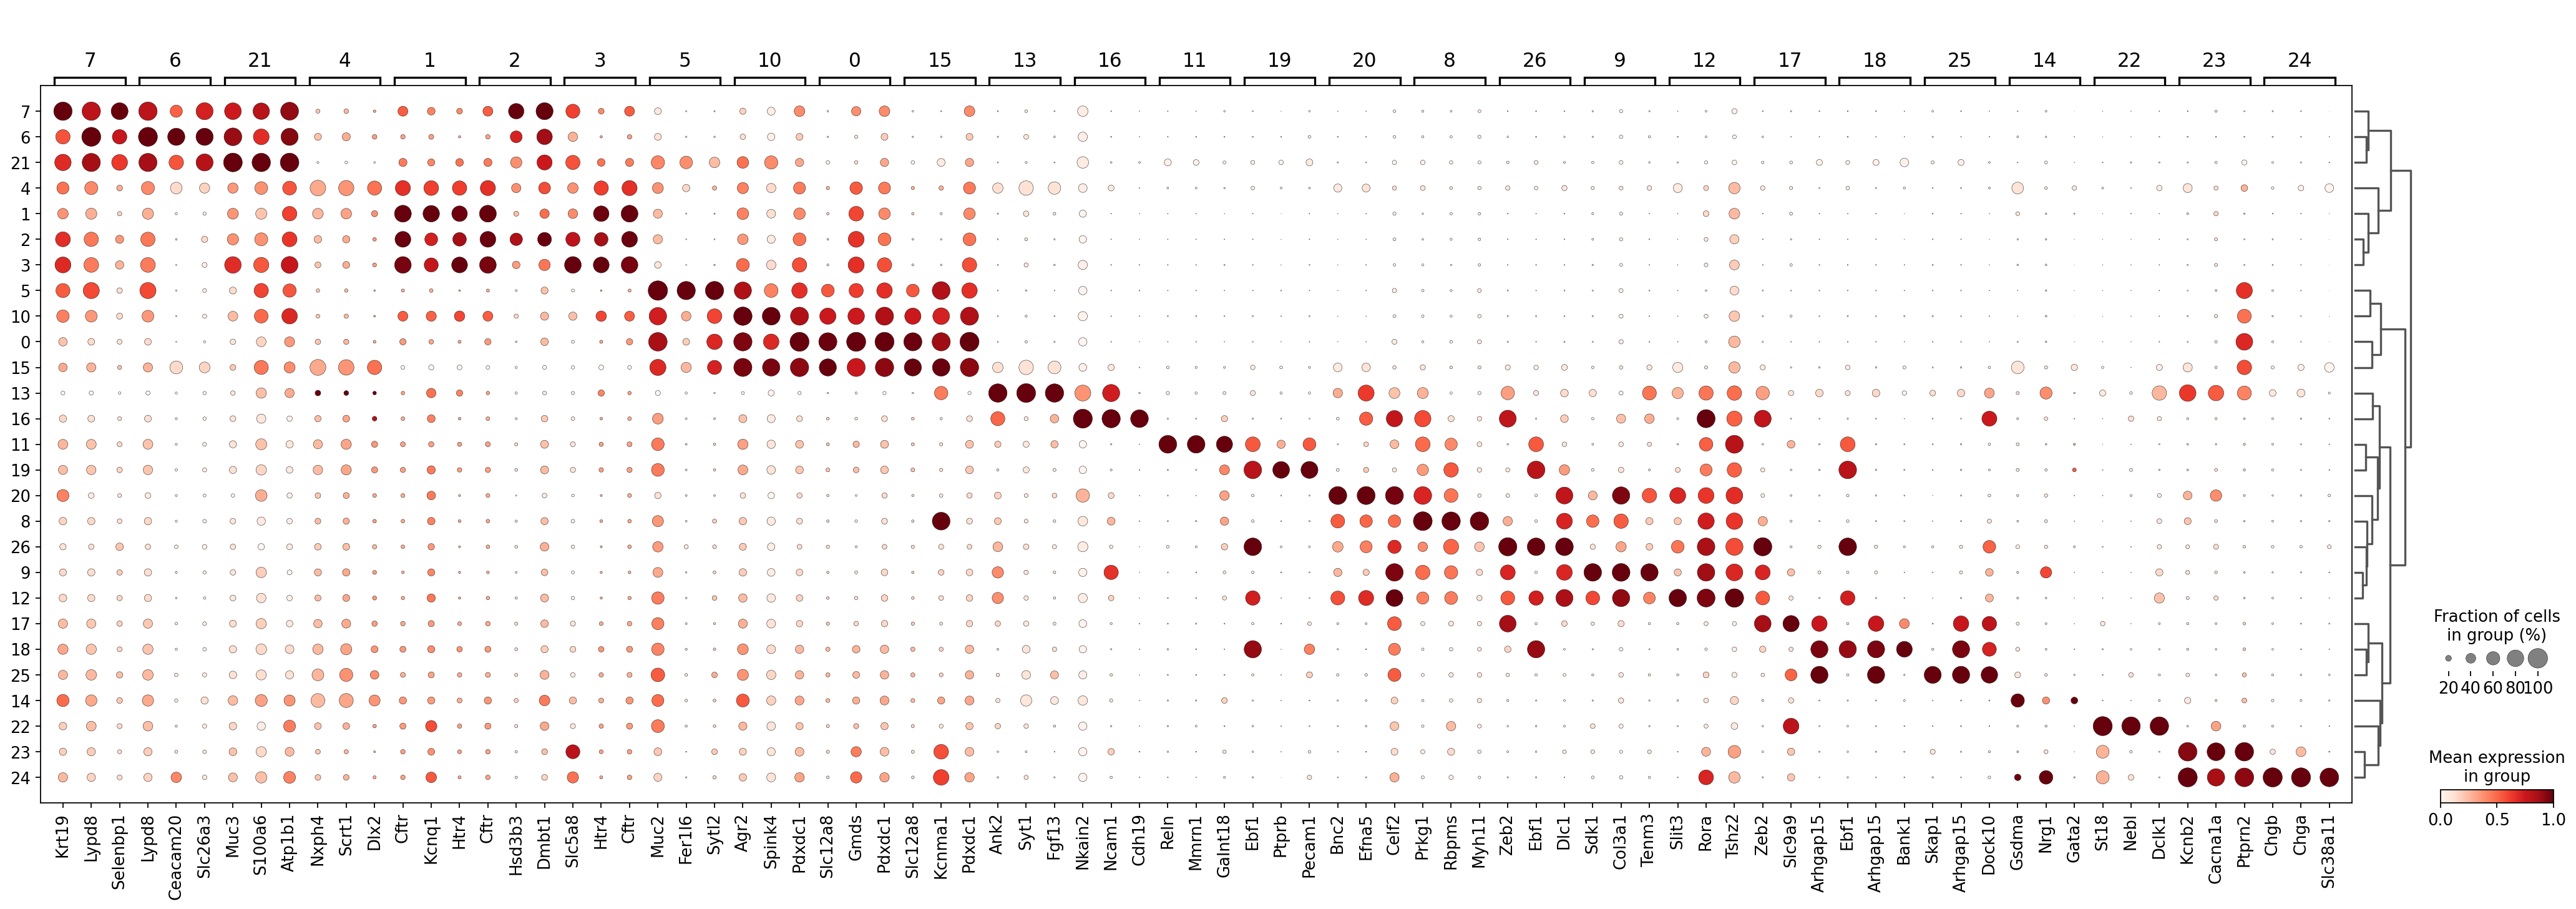

In [47]:
'Plot rankged genes'
sc.pl.rank_genes_groups_dotplot(adata_c, key='leiden', n_genes=3, groupby=['leiden'], standard_scale = 'var',)

In [58]:
# plots sanity check for 4 genes
sc.pl.paga(adata_c, color=adata_c.uns['leiden']['names']['0'][0:3],)

In [ ]:
# do cluster renaming to be sure all possible cells make it
leiden_to_ct = {
    '0' : 'TA_1', #ok
    '1' : 'TA_4', #ok  
    '2' : 'Colonocyte_2',  #ok
    '3' : 'TA_3', #ok  
    '4' : 'TA_2', #ok  
    '5' : 'Stem_1', #ok 
    '6' : 'Cycling_TA_2', #ok
    '7' : 'TA_5', #ok  
    '8' : 'Myocyte_1', #ok  
    '9' : 'Colonocyte_1', #ok 
    '10' : 'Fibroblast', #ok
    '11' : 'Lymphatic', #ok 
    '12' : 'Fibroblast',
    '13' : 'Neuron_1', #ok 
    '14' : 'TA_7',  #ok
    '15' : 'Cycling_TA_1', #ok 
    '16' : 'Glia', #ok
    '17' : 'Macrophage', #ok  
    '18' : 'B_cell', #ok  
    '19' : 'Vascular', #ok
    '20' : 'Mesothelial', #ok
    '21' : 'Macrophage',
    '22' : 'Tuft', #ok
    '23' : 'Enteroendocrine_2', #ok
    '24' : 'Enteroendocrine_1', #ok
    '25' : 'T_cell', #ok
    '26' : 'Goblet',  #ok
}

In [ ]:
adata_c.obs['leiden_cell_types'] = pd.Categorical(adata_c.obs['leiden'].replace(leiden_to_ct))

In [ ]:
sc.pl.umap(adata_c, color=['leiden_cell_types'], use_raw=False)

#### Plots total cluster cell proportions

In [ ]:
props = get_cluster_proportions(adata_c,
                            cluster_key="leiden_cell_types",
                            sample_key="age",
                            drop_values=None)

In [ ]:
pl = plot_cluster_proportions(props, cluster_palette=None, xlabel_rotation=0, order = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '6m', '1yr', '2yr'])

Save this anndata object (raw and processed)

In [59]:
adata_c.write_h5ad('/home/svickovi/data/sc_anndatas/adata_colons_dev_without12w.h5ad')